In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Displaying the dataset
print(f'Features shape: {X.shape}')
print(f'Labels shape: {y.shape}')
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')

# Converting to DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

Features shape: (150, 4)
Labels shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
# Scaling the features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Displaying scaled data
pd.DataFrame(X_scaled, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Explained Variance Ratio: [0.72962445 0.22850762]


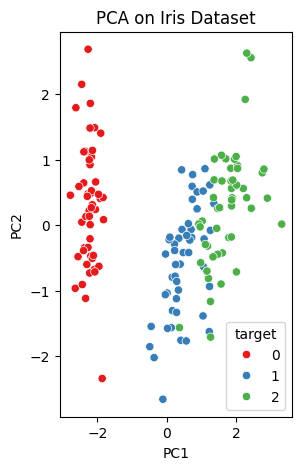

In [6]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA result
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Plotting the PCA result
plt.figure(figsize=(3, 5))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['target'], palette='Set1', data=pca_df)
plt.title('PCA on Iris Dataset')
plt.show()

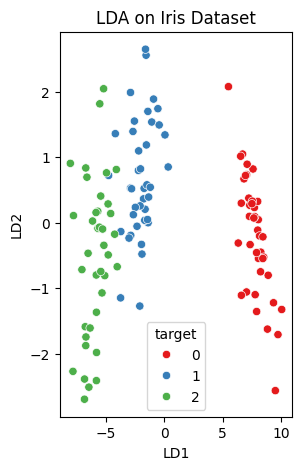

LDA Test Accuracy: 1.0


In [7]:
# Splitting the data into train and test sets for LDA evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Applying LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# LDA result
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['target'] = y_train

# Plotting the LDA result
plt.figure(figsize=(3, 5))
sns.scatterplot(x='LD1', y='LD2', hue=lda_df['target'], palette='Set1', data=lda_df)
plt.title('LDA on Iris Dataset')
plt.show()

# Testing accuracy of LDA
X_test_lda = lda.transform(X_test)
y_pred_lda = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lda)
print(f'LDA Test Accuracy: {accuracy}')

### Difference between PCA and LDA:
- **PCA (Principal Component Analysis)** is an unsupervised dimensionality reduction technique. It finds new axes (principal components) that maximize the variance in the data, without using class labels.
- **LDA (Linear Discriminant Analysis)** is a supervised dimensionality reduction technique. It takes class labels into account and finds new axes (linear discriminants) that maximize the separation between classes while also minimizing the variance within each class.
